In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *

import seaborn as sns
import scipy


In [2]:
EVENT = "FeedbackOnset"  # event in behavior to align on
PRE_INTERVAL = 1300   # time in ms before event
POST_INTERVAL = 1500  # time in ms after event
INTERVAL_SIZE = 100  # size of interval in ms

OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"

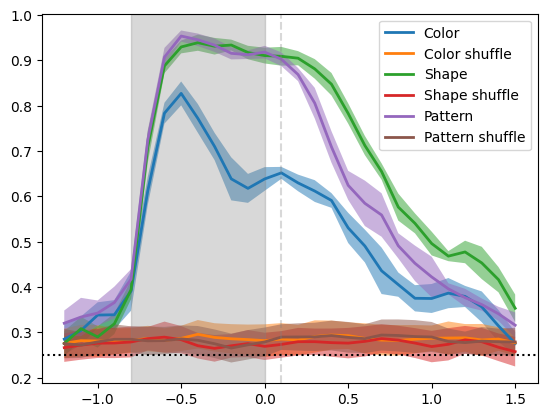

In [3]:
fig, ax = plt.subplots()
subject = "SA"
for feature_dim in FEATURE_DIMS:
    accs = np.load(os.path.join(OUTPUT_DIR, f"{subject}_selected_features_{feature_dim}_test_accs.npy"))
    visualization_utils.visualize_accuracy_across_time_bins(
        accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=feature_dim,
        right_align=True, 
    )
    shuffled_accs = []
    for i in range(10):
        shuffled_acc = np.load(os.path.join(OUTPUT_DIR, f"{subject}_selected_features_{feature_dim}_shuffle_{i}_test_accs.npy"))
        shuffled_accs.append(shuffled_acc)
    shuffled_accs = np.hstack(shuffled_accs)
    visualization_utils.visualize_accuracy_across_time_bins(
        shuffled_accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=f"{feature_dim} shuffle",
        right_align=True, 
    )


ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted')

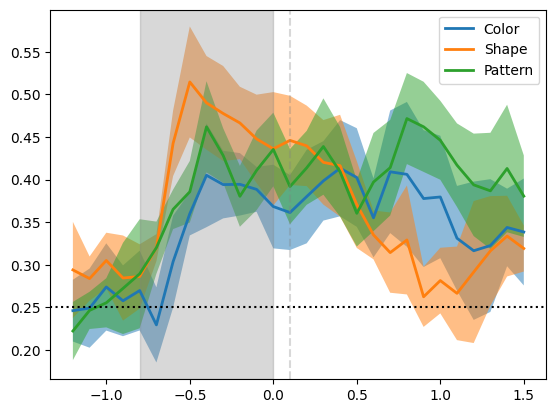

In [6]:
fig, ax = plt.subplots()
subject = "BL"
for feature_dim in FEATURE_DIMS:
    accs = np.load(os.path.join(OUTPUT_DIR, f"{subject}_selected_features_{feature_dim}_test_accs.npy"))
    visualization_utils.visualize_accuracy_across_time_bins(
        accs,
        PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
        ax,
        label=feature_dim,
        right_align=True, 
    )
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted')